In [2]:
!nvidia-smi

Sun Apr  9 15:33:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.89.02    Driver Version: 531.41       CUDA Version: 12.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8     6W /  N/A |    126MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch

device = 'cuda'

generator = torch.Generator(device).manual_seed(1024)

In [4]:
from huggingface_hub import notebook_login
notebook_login()

In [5]:
model_id = "runwayml/stable-diffusion-v1-5"

In [6]:
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=True)
pipe = pipe.to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home/rahul/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

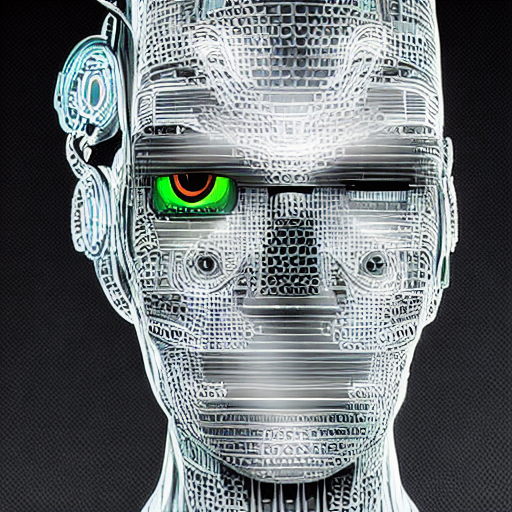

In [9]:
prompt = "cute, cyborg, male, man, hologram, half body, neurochip, android, cyborg, cyberpunk face , d & d, fantasy, intricate, elegant, highly detailed, colorful "
image = pipe(prompt).images[0]  
    
# image.save("sd_img.png")

image

  0%|          | 0/50 [00:00<?, ?it/s]

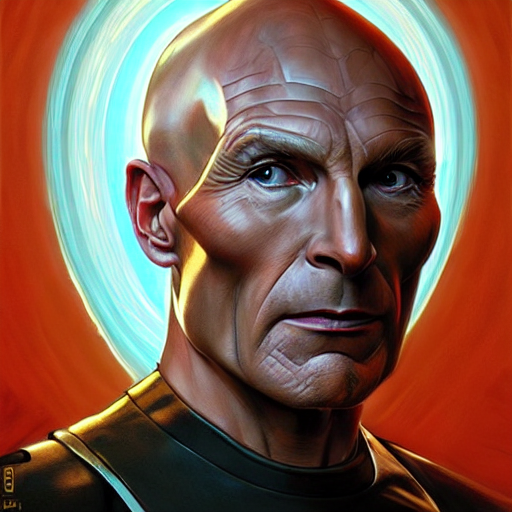

In [8]:
prompt = "Symmetry!! portrait of Captain Picard, warrior in sci-fi armour, tech wear, muscular!! Glowing lights!! sci-fi, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha"
image = pipe(prompt).images[0]  

image